In [2]:
!pip install -U d2l
!python -m pip install paddlepaddle -i https://mirror.baidu.com/pypi/simple

     |████████████████████████████████| 92kB 5.2MB/s 
Looking in indexes: https://mirror.baidu.com/pypi/simple
     |████████████████████████████████| 108.9MB 82kB/s 


# 3.2 线性回归从0开始实现

In [ ]:
import random
# torch
import torch
from d2l import torch as d2l
# paddle
import numpy as np
import paddle
import matplotlib.pyplot as plt

## 3.2.1生成数据集

这里根据带有噪声的线性模型构造一个人造数据集。然后使用这个有限样本的数据集恢复此模型的参数。为了方便可视化，这里采用了低维数据。

下面代码中，生成了一个包含1000个样本的数据集，每个样本包含从标准正态分布中采样的两个特征。合成数据集是一个矩阵：

$$X\in R^{100 \times 2}$$

使用线性模型参数$w=[2,-3.4]^T$、$b=4.2$和噪声项$\varepsilon$生成数据集及其标签：
$$y=Xw+b+\varepsilon$$

你可以将$\varepsilon$视为捕获特征和标签时的潜在观测误差。在这里我们认为标准假设成立，即$\varepsilon$服从均值为0的正态分布。 为了简化问题，我们将标准差设为0.01。下面的代码生成合成数据集。

#### torch版

In [ ]:
def synthetic_data(w, b, num_examples):
    """生成 y = Xw + b + 噪声。"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-0.8951,  1.2933]) 
label: tensor([-2.0025])


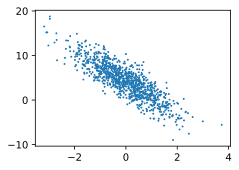

In [ ]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(),
                labels.detach().numpy(), 1);

#### paddle版

In [ ]:
paddle.utils.run_check()

Running verify PaddlePaddle program ... 
PaddlePaddle works well on 1 CPU.
PaddlePaddle works well on 2 CPUs.
PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.


In [ ]:
def synthetic_data_paddle(w, b, num_examples):
  """Generate y = Xw + b + noise."""
  X = np.random.normal(0, 1, (num_examples, len(w)))
  y = np.dot(X, w) + b
  y += np.random.normal(0, 0.01, y.shape)
  return X, y.reshape((-1, 1))

paddle_w = paddle.to_tensor([2, -3.4])
paddle_b = 4.2
paddle_features, paddle_labels = synthetic_data_paddle(paddle_w, paddle_b, 1000)
print('paddle features:', paddle_features[0], '\nlabel:', paddle_labels[0])

paddle features: [1.41962192 1.4765869 ] 
label: [2.04765767]


In [1]:
plt.scatter(paddle_features[:, (1)], paddle_labels, 1);

NameError: ignored